In [0]:
import matplotlib
import numpy as np
import io
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import files
import math

In [15]:
uploaded = files.upload()


Saving dataset_Facebook.csv to dataset_Facebook.csv


In [0]:
s=uploaded["dataset_Facebook.csv"]

In [25]:
df =pd.read_csv(io.StringIO(s.decode("utf-8")), delimiter=";")
print(df.head())

   Page total likes    Type  Category  Post Month  Post Weekday  Post Hour  \
0            139441   Photo         2          12             4          3   
1            139441  Status         2          12             3         10   
2            139441   Photo         3          12             3          3   
3            139441   Photo         2          12             2         10   
4            139441   Photo         2          12             2          3   

   Paid  Lifetime Post Total Reach  Lifetime Post Total Impressions  \
0   0.0                       2752                             5091   
1   0.0                      10460                            19057   
2   0.0                       2413                             4373   
3   1.0                      50128                            87991   
4   0.0                       7244                            13594   

   Lifetime Engaged Users  Lifetime Post Consumers  \
0                     178                      109

In [30]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [32]:
df.shape

(500, 19)

In [34]:
features = ["Category",
            "Page total likes",
            "Type",
            "Post Month",
            "Post Hour",
            "Post Weekday",
            "Paid",
            "Lifetime Post Total Reach",
            "Lifetime Post Total Impressions",
            "Lifetime Engaged Users",
            "Lifetime Post Consumers",
            "Lifetime Post Consumptions",
            "Lifetime Post Impressions by people who have liked your Page",
            "Lifetime Post reach by people who like your Page",
            "Lifetime People who have liked your Page and engaged with your post"]


df[features].head()

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post
0,2,139441,Photo,12,3,4,0.0,2752,5091,178,109,159,3078,1640,119
1,2,139441,Status,12,10,3,0.0,10460,19057,1457,1361,1674,11710,6112,1108
2,3,139441,Photo,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132
3,2,139441,Photo,12,10,2,1.0,50128,87991,2211,790,1119,61027,32048,1386
4,2,139441,Photo,12,3,2,0.0,7244,13594,671,410,580,6228,3200,396


In [35]:

outcomes=  ["comment",
            "like",
            "share",
            "Total Interactions"]

df[outcomes].head()

,comment,like,share,Total Interactions
0,4,79.0,17.0,100
1,5,130.0,29.0,164
2,0,66.0,14.0,80
3,58,1572.0,147.0,1777
4,19,325.0,49.0,393


In [36]:
df[["Type"]] = df[["Type"]].apply(LabelEncoder().fit_transform)

df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,1,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,1,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,1,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,1,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [0]:
df = df.dropna()

In [45]:
outcomes_of_interest = ["like"]
print(outcomes_of_interest)


['like']


In [0]:
X_df = df[features].copy()
y_df = df[outcomes_of_interest].copy()


In [0]:

cat_features = ["Category",
            "Type",

            "Paid"]


X_df = pd.get_dummies(X_df, columns = cat_features)

In [57]:
print(X_df.head())

   Page total likes  Post Month  Post Hour  Post Weekday  \
0            139441          12          3             4   
1            139441          12         10             3   
2            139441          12          3             3   
3            139441          12         10             2   
4            139441          12          3             2   

   Lifetime Post Total Reach  Lifetime Post Total Impressions  \
0                       2752                             5091   
1                      10460                            19057   
2                       2413                             4373   
3                      50128                            87991   
4                       7244                            13594   

   Lifetime Engaged Users  Lifetime Post Consumers  \
0                     178                      109   
1                    1457                     1361   
2                     177                      113   
3                    2211       

In [0]:

X = X_df.values
y = y_df.values.T[0]

In [72]:

print (X.shape)

clf = sklearn.ensemble.AdaBoostRegressor(DecisionTreeRegressor(),n_estimators = 1000)

print (X.shape, y.shape)
stdy = y
clf.fit(X,stdy)

print (mse(stdy,clf.predict(X)))

(495, 21)
(495, 21) (495,)
244.21212121212122


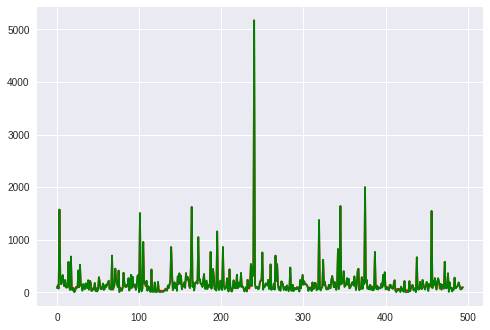

In [80]:
plt.plot(clf.predict(X),'r',stdy,'g')

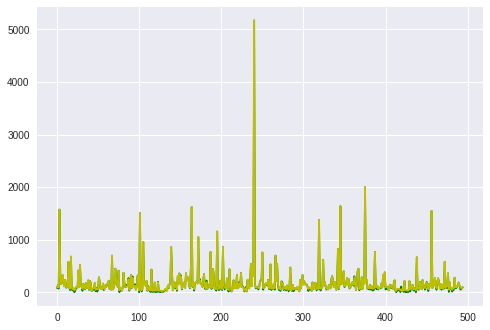

In [78]:
plt.plot(stdy,'g',clf.predict(X),'y')

In [86]:
X[0]
a= np.array([[139441,     12,      3,      4,   2752,   5091,    178,    109,
          159,   3078,   1640,    119,      0,      1,      0,      0,
            1,      0,      0,      1,      0]])
clf.predict(a)

array([88.])

In [196]:
clf.score(X,y)

0.9976748487185219

0.8623556019087474 937


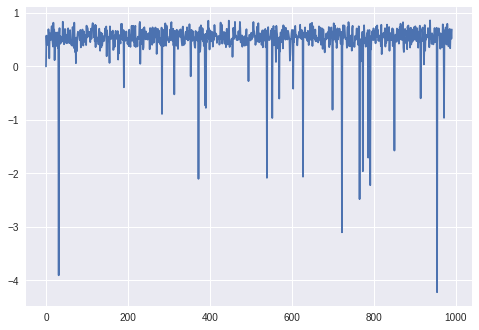

In [203]:
a=[0]
m=0
for i in range(10,1000):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
  reg_1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=18),n_estimators=i)
  model_1 = reg_1.fit(X_train, y_train)
  m=max(m,a[-1])
  a.append(reg_1.score(X_test,y_test))
#   print(reg_1.score(X_train,y_train))
plt.plot(a)
print(m,a.index(m))

In [0]:
y_1=reg_1.predict(X_test)


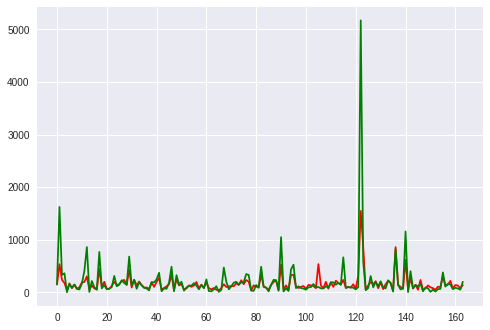

In [171]:
plt.plot(y_1,'r',y_test,'g')

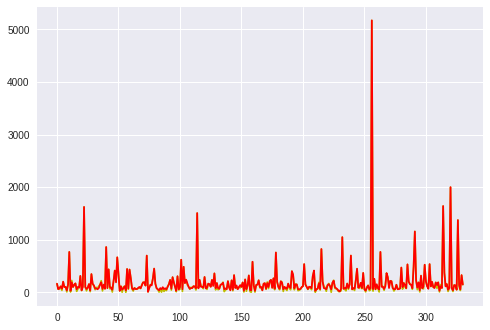

In [152]:
plt.plot(y_train,'y',reg_1.predict(X_train),'r')

In [147]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9981429139355015
0.9945888047147811


In [141]:
X_test.shape


(164, 21)

In [158]:
from math import sqrt
print (sqrt(mse(y_test,clf.predict(X_test))))

15.116821513893946


0.7786106073423241
0.9970498811526317
